In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 1 VISUALIZACION

### 1.1
Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [3]:
df_cities = pd.read_csv("C:/Users/david/Downloads/california_cities.csv")

In [4]:
df_cities

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


### 1.2
Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:

+ Un dataframe
+ Una columna numérica del dataframe
+ Una columna numérica del dataframe diferente a la anterior.
+ Un columna categórica (Opcional, valor por defecto None)
+ Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)
+ La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente.

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot(df, num_col1, num_col2, cat_col=None, size=None, scale=1):

    plt.figure(figsize=(10, 6))
    
    sizes = None
    if isinstance(size, str):
        sizes = df[size] * scale
    elif size is not None:
        sizes = size
    
    if cat_col is not None:
        sns.scatterplot(data=df, 
                        x=num_col1, 
                        y=num_col2, 
                        hue=cat_col,
                        size=sizes,
                        sizes=(20, 200) if sizes is not None else None,
                        alpha=0.7)
    else:
        sns.scatterplot(data=df, 
                        x=num_col1, 
                        y=num_col2,
                        size=sizes,
                        sizes=(20, 200) if sizes is not None else None,
                        alpha=0.7)
    
    plt.title(f'Diagrama de dispersión: {num_col1} vs {num_col2}')
    plt.xlabel(num_col1)
    plt.ylabel(num_col2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

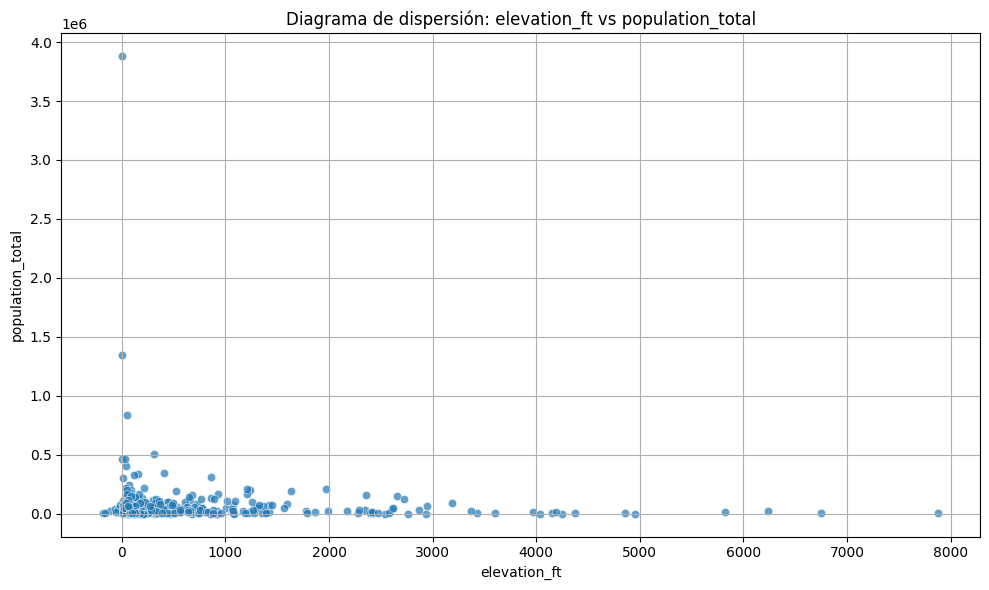

In [7]:
scatter_plot(df_cities, 'elevation_ft', 'population_total')

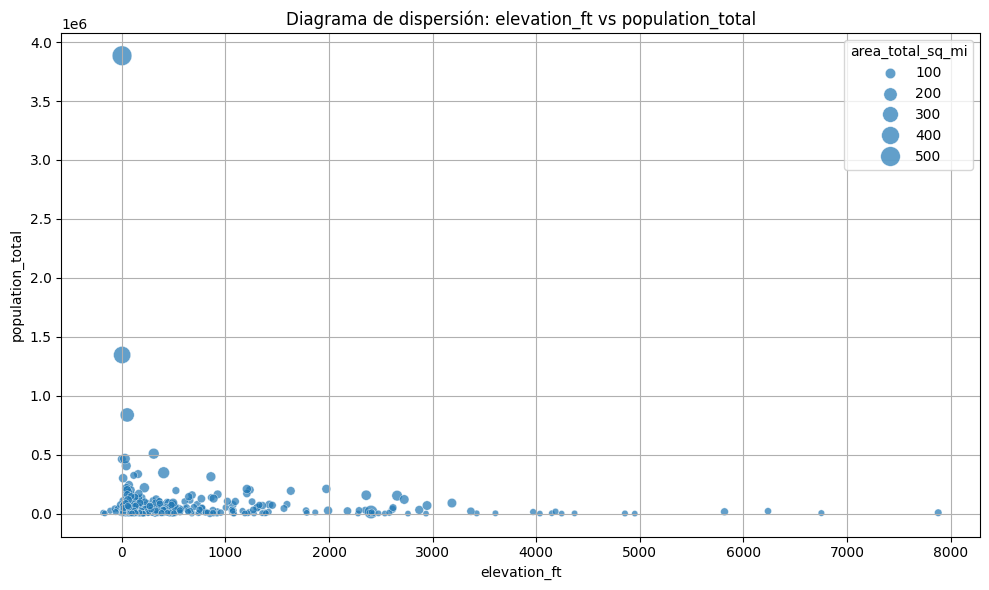

In [12]:
scatter_plot(df_cities, 'elevation_ft', 'population_total', size='area_total_sq_mi')

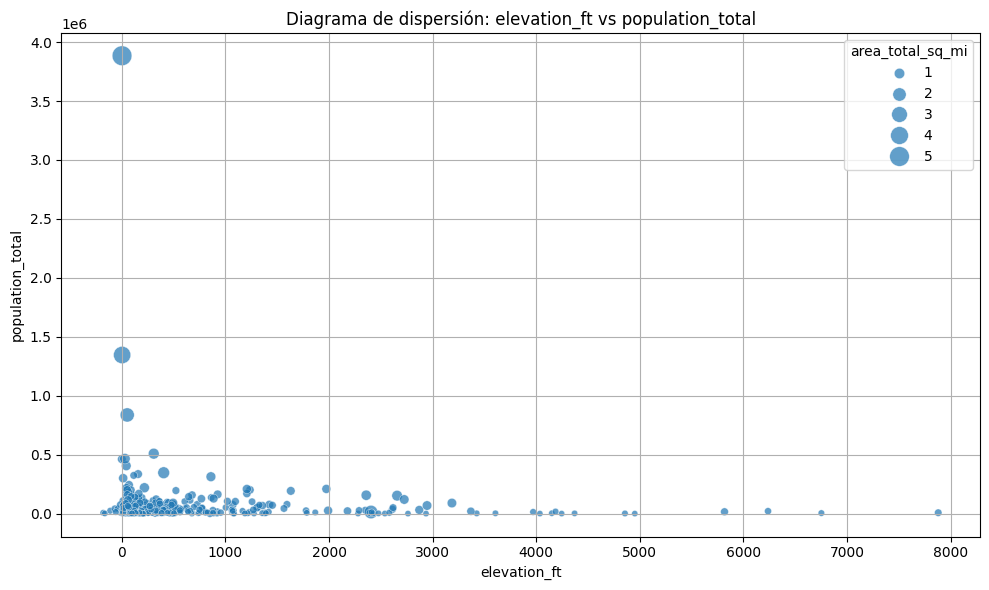

In [15]:
scatter_plot(df_cities, 'elevation_ft', 'population_total', size='area_total_sq_mi', scale=0.01)

### 1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

In [24]:
df = pd.read_csv("C:/Users/david/Downloads/california_cities.csv")



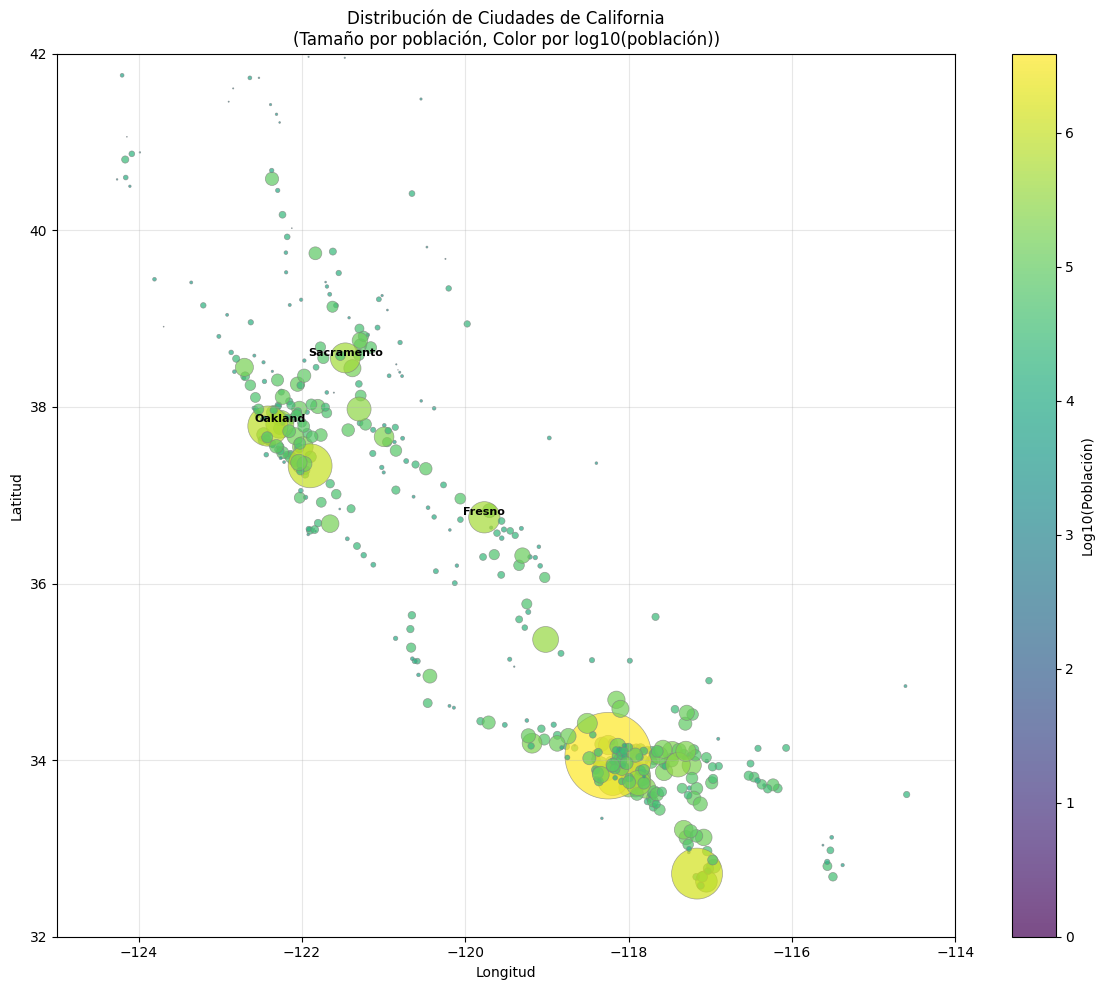

In [26]:
df = df.dropna(subset=['latd', 'longd', 'population_total'])

df['log_poblacion'] = np.log10(df['population_total'])

plt.figure(figsize=(12, 10))

scatter = plt.scatter(
    x=df['longd'],
    y=df['latd'],
    s=df['population_total']/1000,  # Ajustar tamaño para visualización
    c=df['log_poblacion'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='grey',
    linewidth=0.5
)

cbar = plt.colorbar(scatter)
cbar.set_label('Log10(Población)')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de Ciudades de California\n(Tamaño por población, Color por log10(población))')

plt.xlim(-125, -114)
plt.ylim(32, 42)

ciudades_importantes = ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 
                       'Fresno', 'Sacramento', 'Long Beach', 'Oakland']
for _, row in df[df['city'].isin(ciudades_importantes)].iterrows():
    plt.text(row['longd'], row['latd'], row['city'], fontsize=8, 
             ha='center', va='bottom', weight='bold')

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()